<a href="https://colab.research.google.com/github/SpiderPork28/Analitica/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMART


*   S:Have Pokémon stats increased over the course of the generations?
*   M: The total base stats of Pokémon have increased across generations
*   A:
*   R:
*   T:


GitHub













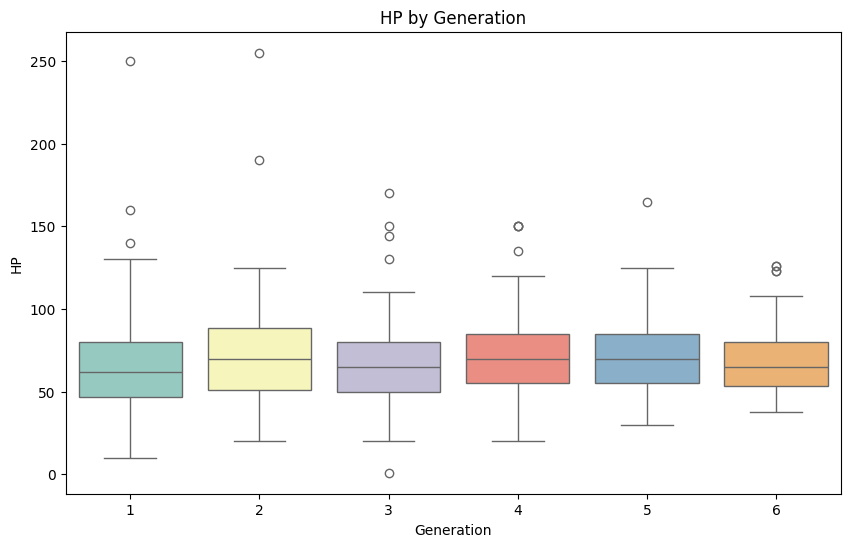

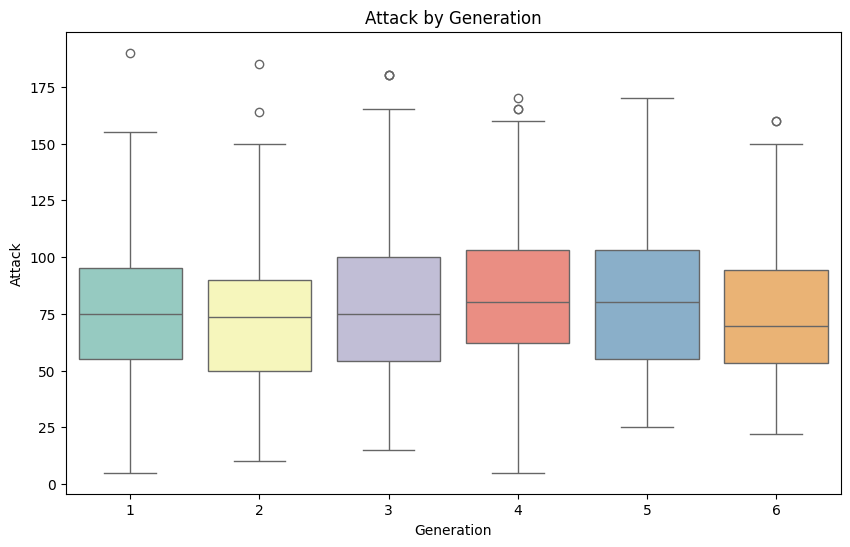

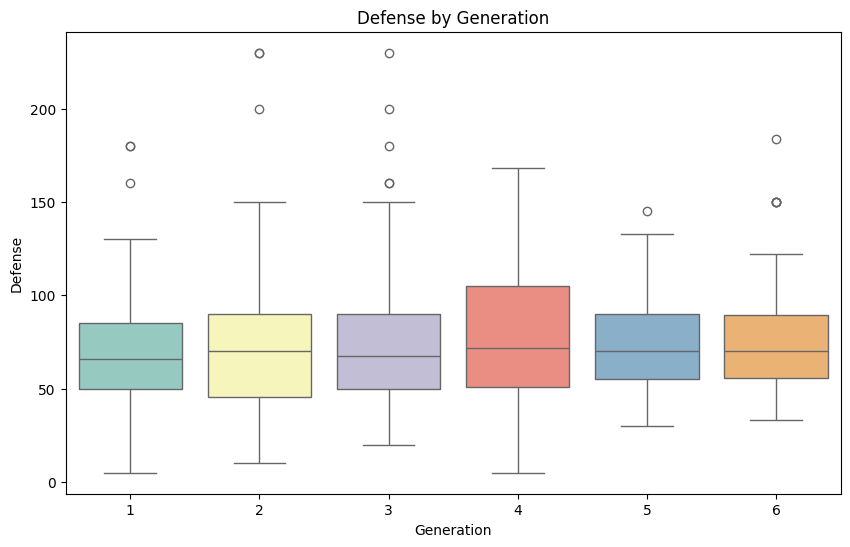

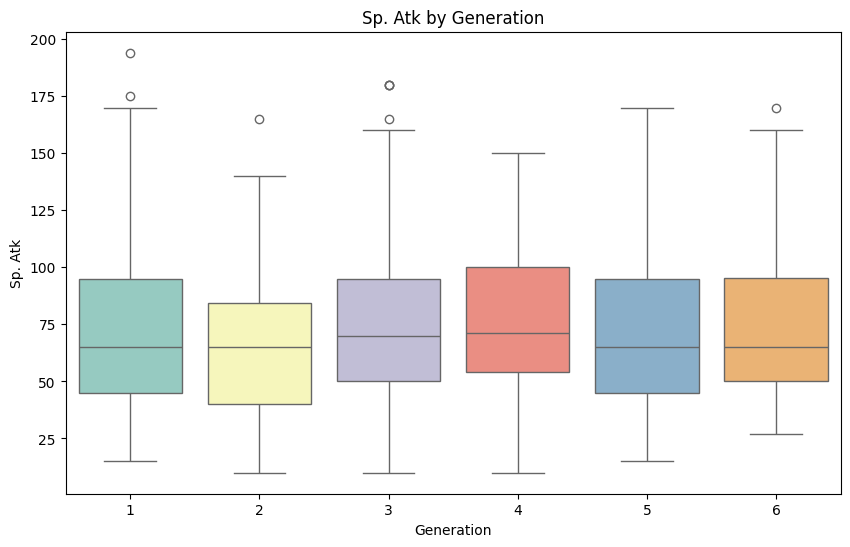

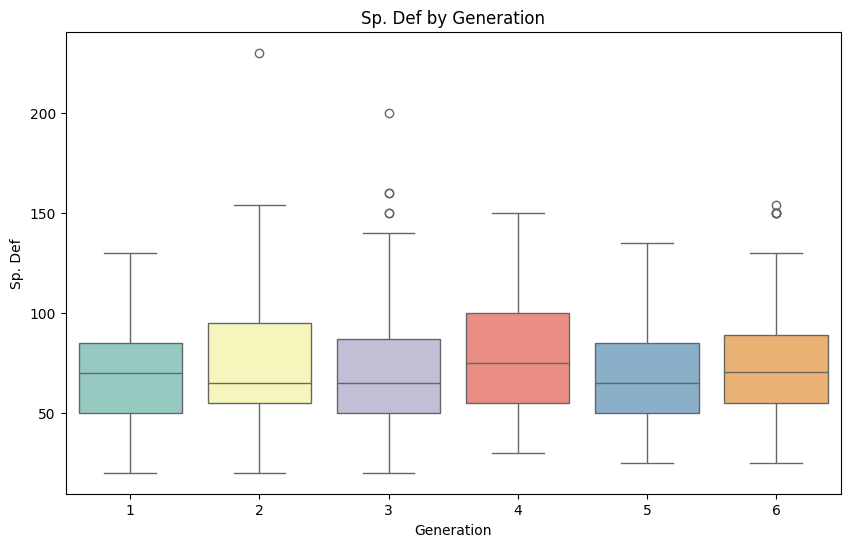

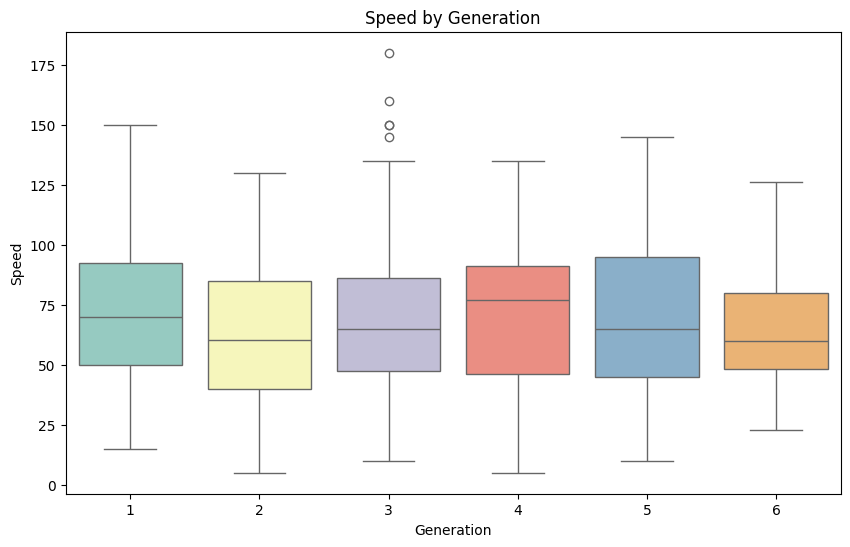

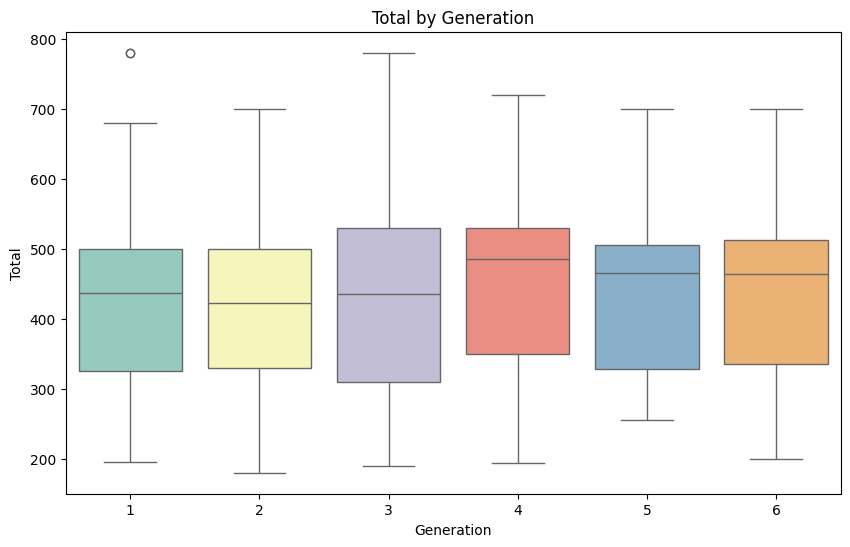

In [3]:
# Seleccionamos las columnas numéricas relevantes
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
statsNor = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Creamos un boxplot para cada estadística agrupado por generación
for stat in stats:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Generation', y=stat, palette='Set3', hue='Generation', legend=False)
    plt.title(f'{stat} by Generation')
    plt.show()

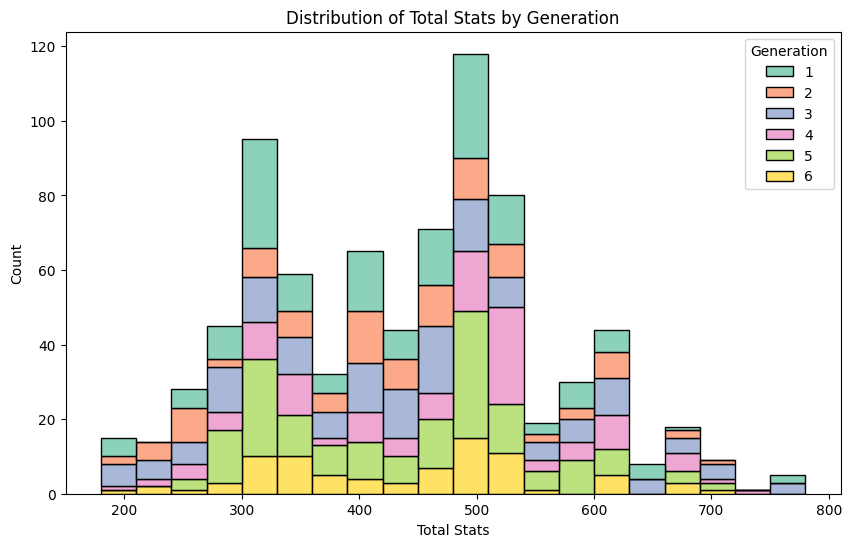

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total', hue='Generation', multiple='stack', palette='Set2', bins=20)
plt.title('Distribution of Total Stats by Generation')
plt.xlabel('Total Stats')
plt.ylabel('Count')
plt.show()

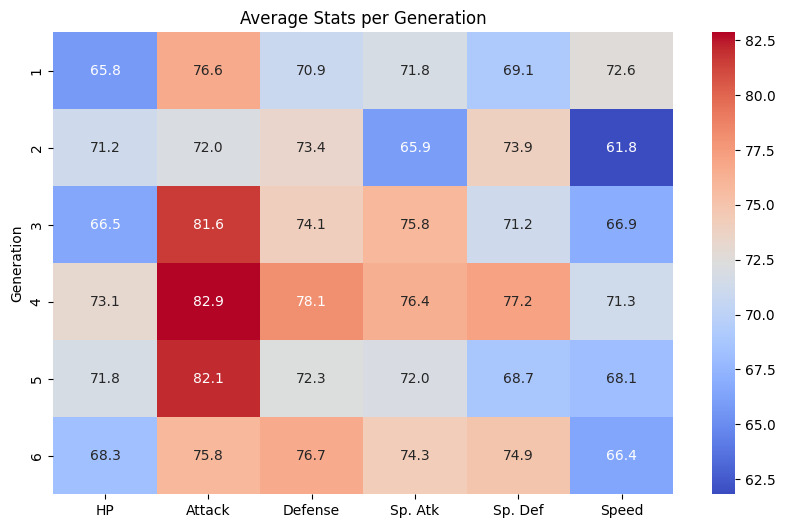

In [5]:
# Calculamos promedios por generación
gen_means = df.groupby('Generation')[statsNor].mean()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gen_means, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Stats per Generation')
plt.show()

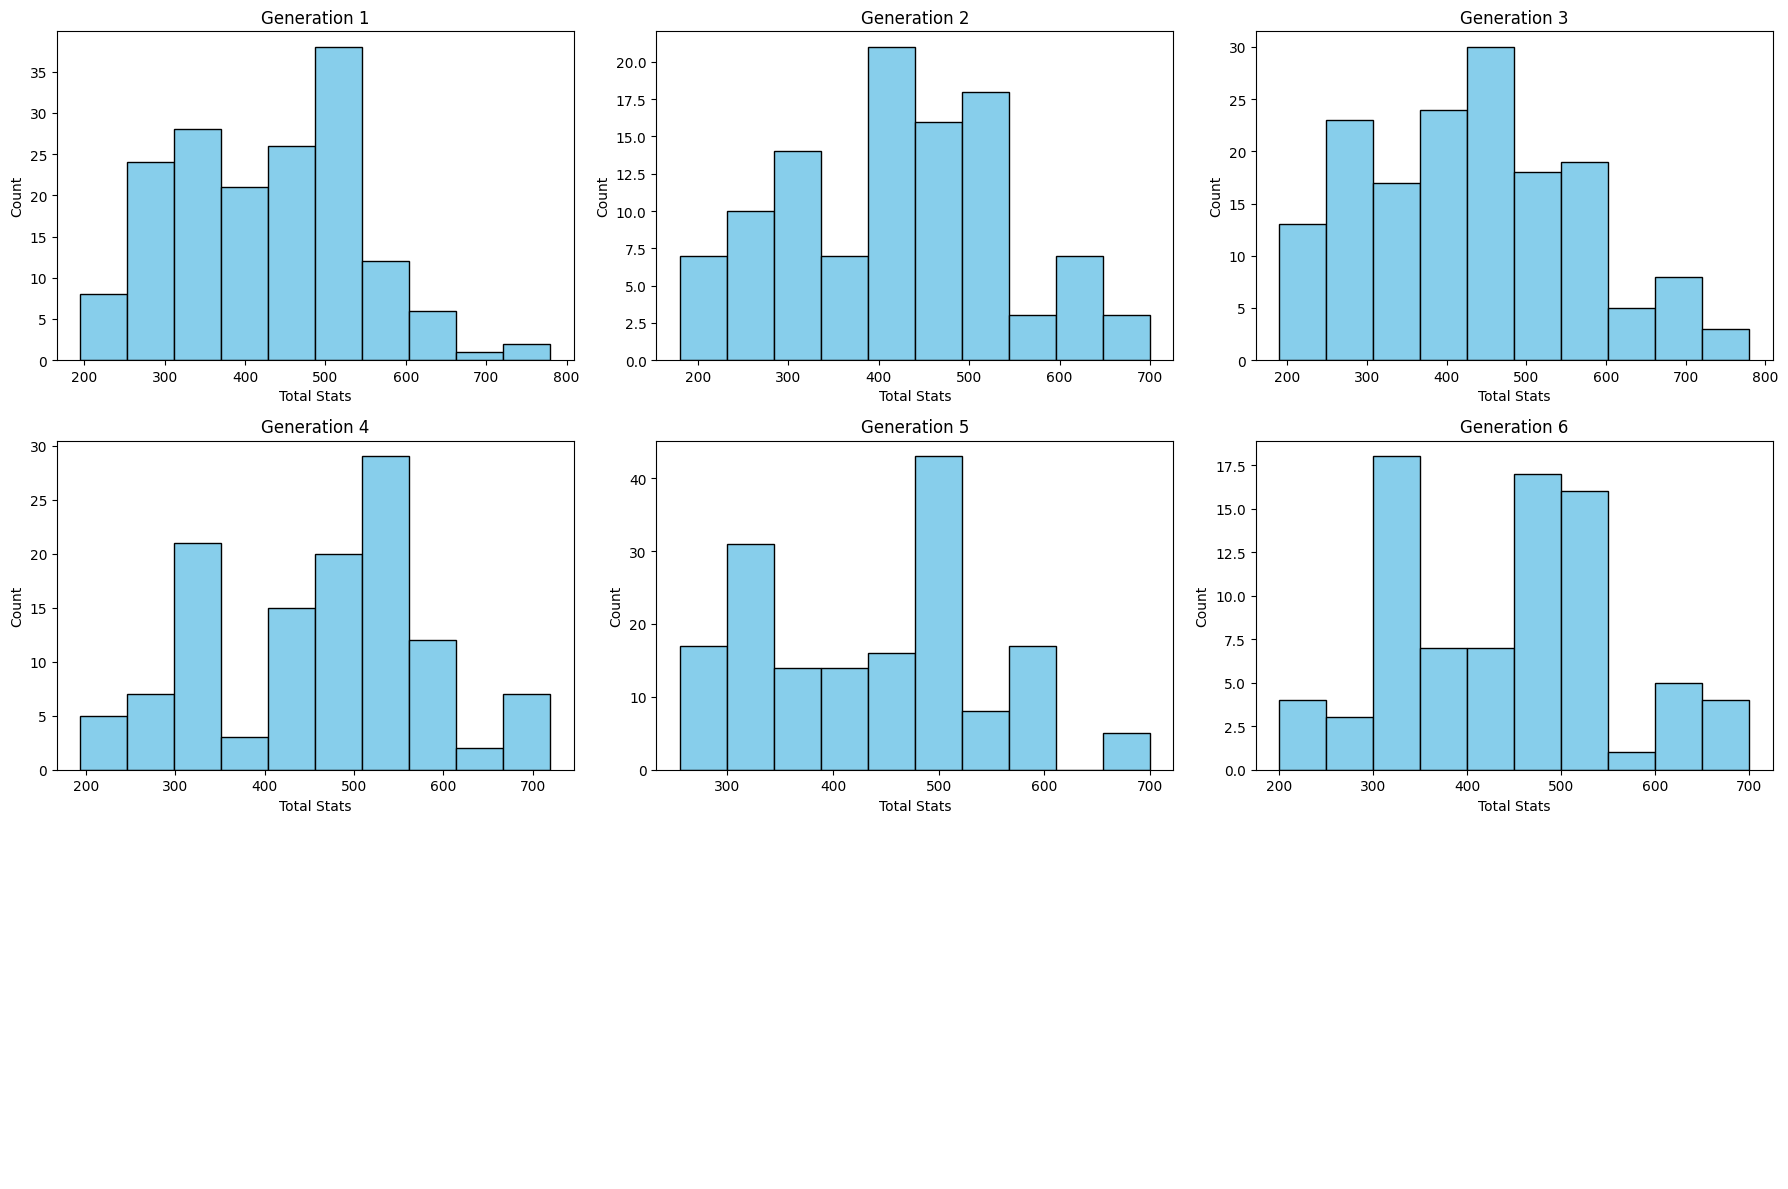

In [6]:
# Asegúrate de que tu DataFrame se llama df y contiene la columna 'Generation'
generaciones = df['Generation'].unique()
generaciones.sort()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, gen in enumerate(generaciones):
    gen_df = df[df['Generation'] == gen]
    axes[i].hist(gen_df['Total'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Generation {gen}')
    axes[i].set_xlabel('Total Stats')
    axes[i].set_ylabel('Count')

# Ocultar los subplots vacíos si hay menos de 9 generaciones
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

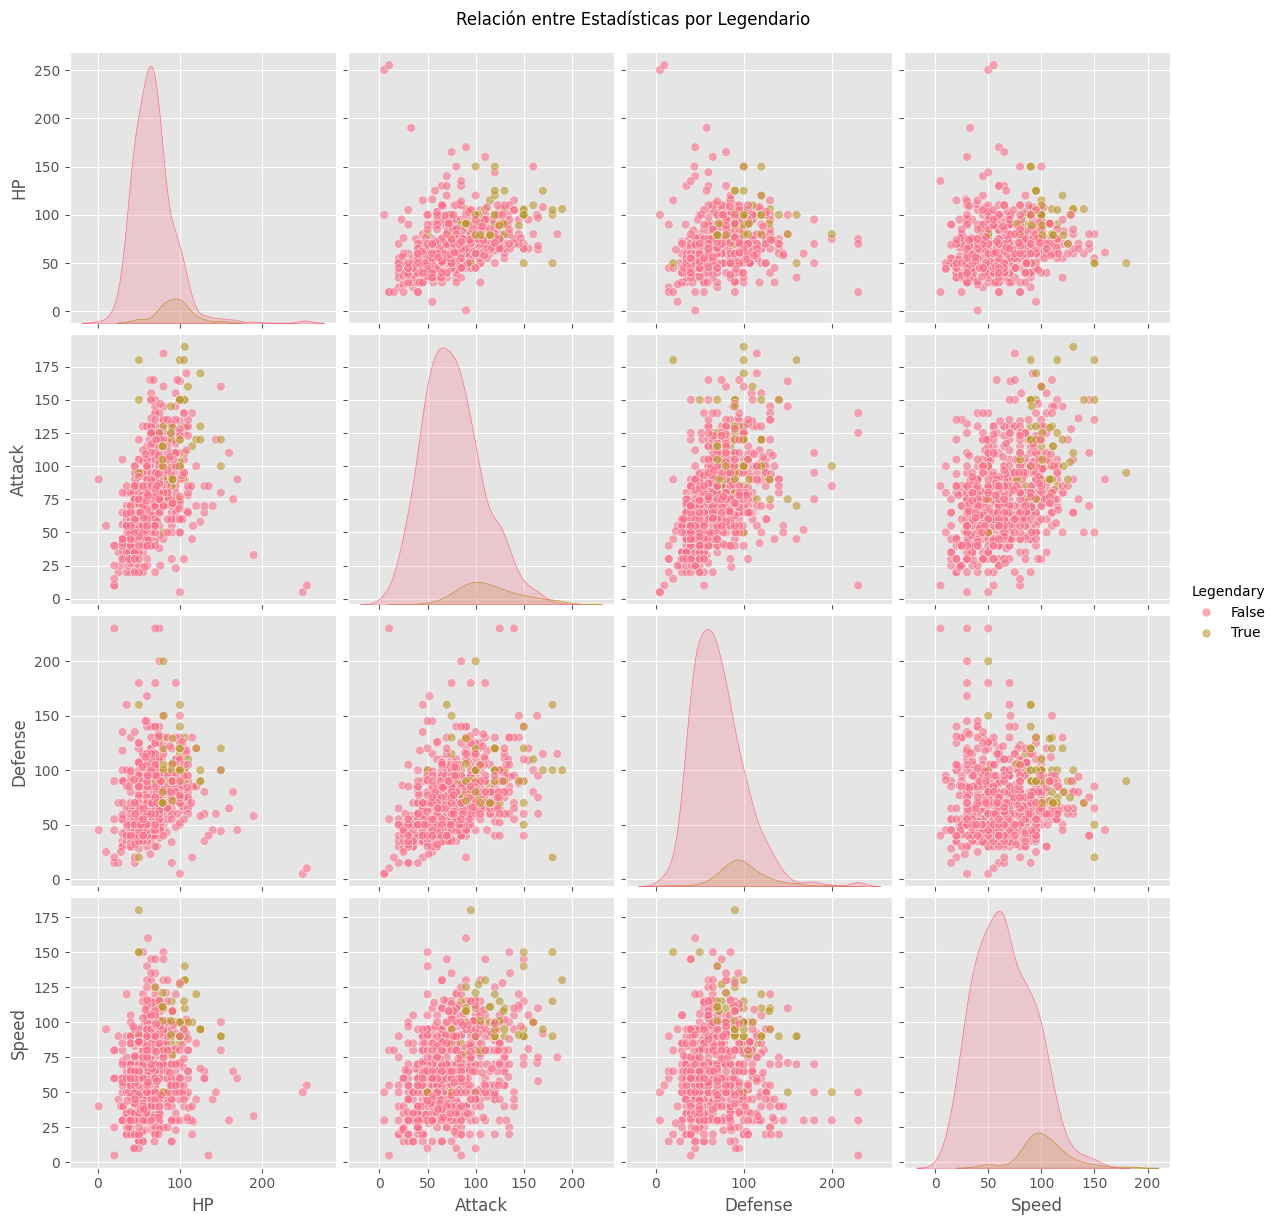

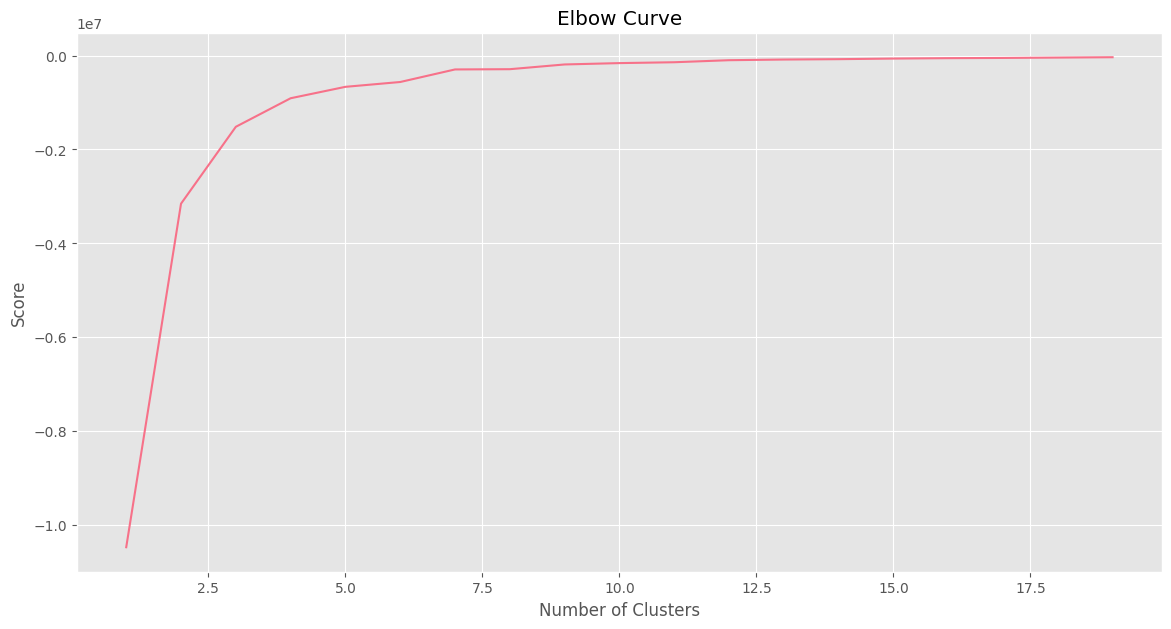

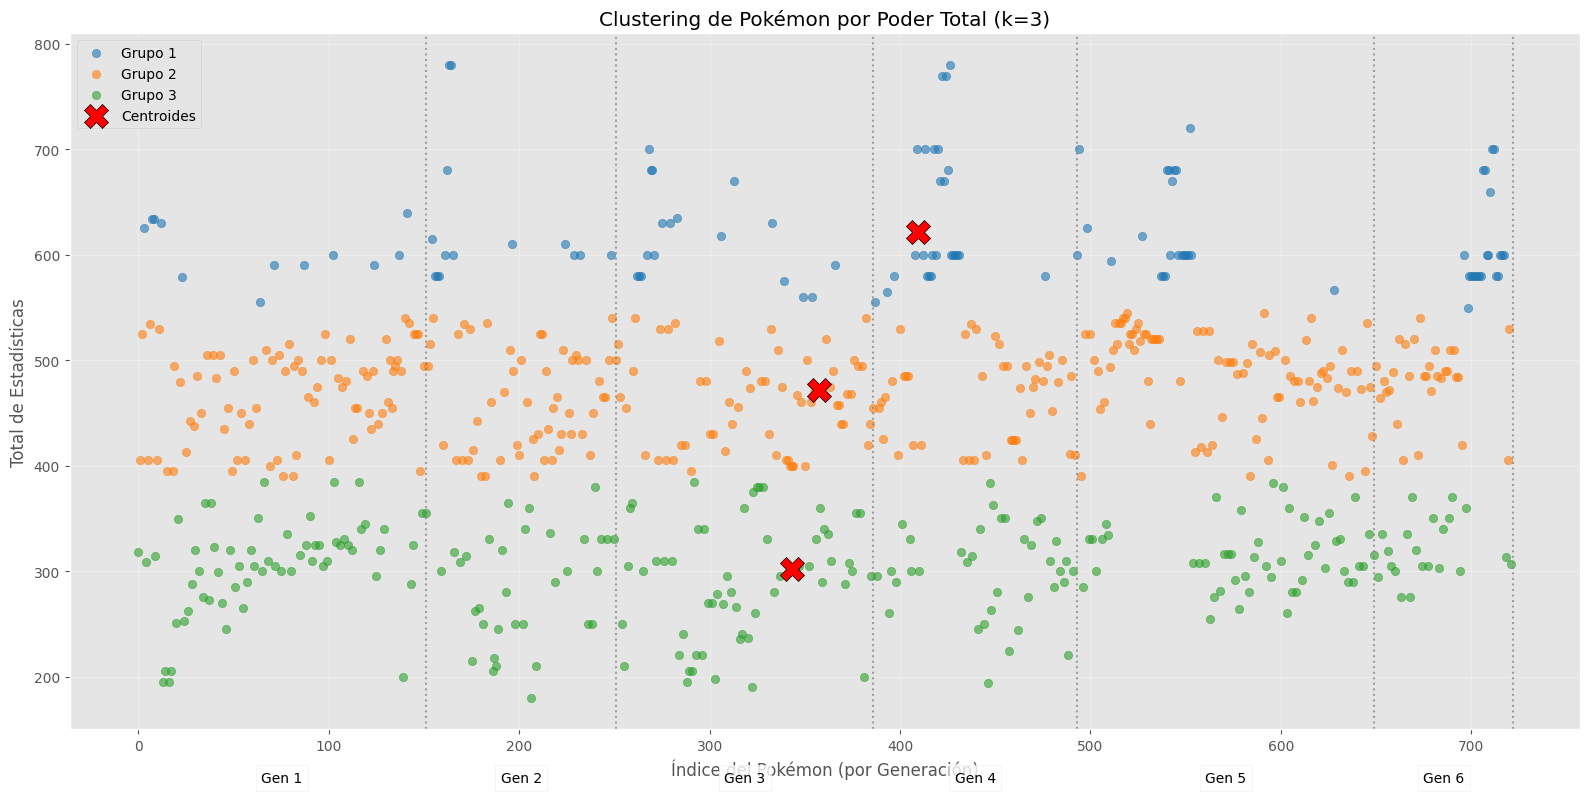


RESUMEN FINAL:

Centroides: [622. 472. 302.]

● Grupo 1:
   Rango Total: 550-780
   Ejemplos:
                 Name  Type 1  Total
   DeoxysAttack Forme Psychic    600
   MeloettaAria Forme  Normal    600
SceptileMega Sceptile   Grass    630

● Grupo 2:
   Rango Total: 390-545
   Ejemplos:
   Name Type 1  Total
 Audino Normal    445
Beartic    Ice    485
Fraxure Dragon    410

● Grupo 3:
   Rango Total: 180-385
   Ejemplos:
    Name Type 1  Total
 Sentret Normal    215
  Spinda Normal    360
Ducklett  Water    305


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score # Importing the missing silhouette_score function

# Configuración
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)
sns.set_palette("husl")


# Cargar y preparar datos
df = pd.read_csv("Pokemon.csv")
df = df[df.index <= 721]  # Solo hasta Gen 6
df = df[~df.index.duplicated(keep='first')]


# 2. Pair Plot (usando solo 4 características para claridad)
features = ['HP', 'Attack', 'Defense', 'Speed']
sns.pairplot(df, hue='Legendary', height=3, vars=features,
             plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Relación entre Estadísticas por Legendario', y=1.02)
plt.show()

# 4. Clustering con K-Means (usando Total)
X = df[['Total']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Aplicar K-Means con k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualización final de clustering
plt.figure(figsize=(16, 8))
generation_bounds = {1:(0,151), 2:(151,251), 3:(251,386),
                    4:(386,493), 5:(493,649), 6:(649,722)}

# Scatter plot por cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Total'],
                c=colors[i], label=f'Grupo {i+1}', alpha=0.6)

# Centroides
x_pos = [df[df['Cluster'] == i].index.to_series().mean() for i in range(k)]
plt.scatter(x_pos, centroids, marker='X', s=300, c='red',
            edgecolors='black', label='Centroides')

# Líneas de generación
for gen, (start, end) in generation_bounds.items():
    plt.axvline(end, color='gray', linestyle=':', alpha=0.7)
    plt.text((start+end)/2, 100, f'Gen {gen}',
             ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Índice del Pokémon (por Generación)')
plt.ylabel('Total de Estadísticas')
plt.title('Clustering de Pokémon por Poder Total (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen estadístico
print("\nRESUMEN FINAL:")
print(f"\nCentroides: {centroids.flatten().round(0)}")
for i in range(k):
    group = df[df['Cluster'] == i]
    print(f"\n● Grupo {i+1}:")
    print(f"   Rango Total: {group['Total'].min():.0f}-{group['Total'].max():.0f}")
    print("   Ejemplos:")
    print(group[['Name', 'Type 1', 'Total']].sample(3).to_string(index=False))

Conclusiones
